#Proyecto 2: Clasificación morfológica y espectral de galaxias

![alt text](https://raw.githubusercontent.com/rpmunoz/PentaUC/master/Astronomia%20era%20informacion/data/clasificacion_hubble.jpg)

En este taller trabajaremos con un catálogo de galaxias del survey astronómico Sloan Digital Sky Survey (SDSS). El SDSS es un proyecto internacional que comenzó a ejecutarse el año 2000 y desde entonces ha producido catálogos que contiene cientos de miles de galaxias. Mas información del survey en el link http://www.sdss.org/surveys/

El SDSS survey ha permitido que cualquier persona interesada en la Astronomia pueda visitar el sitio web y explorar las imagenes y catalogos del survey. Un ejemplo muy exitoso del uso de los datos del SDSS es el sitio web llamado Galaxy Zoo, el cual se puede visitar usando el siguiente link https://www.galaxyzoo.org/?lang=es

##Objetivo

Los alumnos deberán entender en qué consiste un sistema de clasificación y comprender la importancia de éste para ordenar y sistematizar el conocimiento. Deberán ser capaces de definir un sistema de clasificación de galaxias basado en información disponible en catálogos, imágenes y espectros de galaxias.

La Clasificación es el ordenamiento o la disposición por clases. Básicamente, la clasificación implicará la búsqueda en un todo de todas aquellas cosas que guarden o compartan algún tipo de relación para así agruparlas. Generalmente, el objetivo primordial de la clasificación es encontrar el mejor ordenamiento posible, es decir, el más claro, para que, llegado el momento de la búsqueda de determinado elemento que ha sido clasificado, éste resulte más fácil de encontrar: ese es, primordialmente, el fin de toda clasificación.


##Catálogo del SDSS con galaxias de diferentes tipos (data1)

Contiene una lista 40 galaxias que fueron observadas en el SDSS. Estas galaxias están relativamente cercanas y se pueden distinguir de buena manera sus caracteristicas morfologicas. El catálogo contiene las siguientes columnas,

- **ra**: Ascensión recta de la galaxia en unidades de grados
- **dec**: Declinación recta de la galaxias en unidades de grados
- **u**: Magnitud de la galaxias en el filtro u
- **g**: Magnitud de la galaxias en el filtro g
- **r**: Magnitud de la galaxias en el filtro r
- **i**: Magnitud de la galaxias en el filtro i
- **z**: Magnitud de la galaxias en el filtro z


##Catálogo del SDSS con 10.000 galaxias (data2)

Contiene una lista 10.000 galaxias que fueron observadas en el SDSS. Algunas de estas galaxias son cercanas y otras son muy lejanas. Contiene las mismas columnas que el catalogo data1, y solo aparecen estas nuevas columnas

- **l_gal**: Longitud galactica medida en unidades de grados
- **b_gal**: Latitud galactica medida en unidades de grados


##Ideas para desarrollar el taller

###1. Diseñar un sistema de clasificacion de tipos de galaxias usando imagenes
**Usar data1**

Desplegar imágenes JPG o FITS de las galaxias del catálogo data1. Inspeccionar cada uno de las imagens y definir que caracterísitcas diferencian unas de otras. Definir un criterio de clasificacón de galaxias basado solamente en el uso de imágenes y formas de las galaxias.
- Defina cuales propiedades usará para construir sus sistema de clasifiación
- Defina al menos tres categorías dentro de su sistema
- Describa cada uno de las categorías
- Asigne las galaxias del catálogo a cada uno de las categorías usando los números que aparecen en las imágenes

Ver taller 4 y 9.

###2. Diseñar un sistema de clasificacion de tipos de galaxias usando espectros 
**Usar data1**

Desplegar espectros de las galaxias del catálogo data1. Inspeccionar cada uno de los espectros y definir que caracterísitcas diferencian unos de otros. Definir un sistema de clasificación de galaxias basado solamente en el uso de espectros y formas de los espectros.
- Defina cuales propiedades usará para construir sus sistema de clasifiación
- Defina al menos tres categorías dentro de su sistema
- Describa cada uno de las categorías
- Asigne las galaxias del catálogo a cada uno de las categorías usando los números que aparecen en las imágenes

Ver taller 9

###3. Diseñar un sistema de clasificacion usando de manera conjunta imagenes y espectros
**Usar data1**

Desplegar tanto imágenes como espectros de las galaxias del catálogo data1. Definir un sistema de clasificación que este basado tanto en la morfología de las galaxias como la forma de sus espectros.
- Defina cuales propiedades usará para construir sus sistema de clasifiación
- Defina al menos tres categorías dentro de su sistema. Puede basarser en las definidas en las partes 1 y 2.
- Asigne las galaxias del catálogo a cada uno de las categorías usando los números que aparecen en las imágenes

Ver taller 9

###4. Analizar propiedades físicas de las galaxias y definir una clasificación cuantitativa
**Usar data1**

Hacer gráficos del tipo scatter e histogramas 2D usando la información como la magnitud y color de las galaxias. Deberá usar los valores disponibles en el catalogo data1 y calcular colores en base a las columnas de magnitud. Deberá ser capaz de distinguir diferentes secuencias de galaxias usando gráficos de puntos e histogramas.
- Para cada uno de las categorías definidas en el punto anterior, defina el rango de valores en magnitud y color que le corresponden.

Ver taller 4

###5. Aplicar el criterio cuantitativo derivado en la pregunta 4 y clasificar galaxias de manera automatizada
**Usar data2**

En base al sistema de clasificacón desarrollado entre las partes 1 a la 4, definir los tipos de galaxias de sus sistema de clasificación y los rangos de valores en magnitud y color para cada tipo de galaxia. A esto último le llamaremos criterios. Use estos criterios para clasificar de manera automatizada las 10.000 galaxias del catalogo data2.

In [19]:
integrante1 = 'Alexander Barrera'
integrante2 = 'Valentina Tapia'
integrante3 = 'Constanza Zuleta'

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline

from sdss_tools import sdss_jpg, sdss_fits, sdss_spectra, sdss_template

from astropy import units as u
from astropy.coordinates import SkyCoord, Angle
from astroquery.sdss import SDSS

rc('font', size=14)
rc('axes', labelsize=22)

In [6]:
# Catalogo que contiene una muestra pequeña galaxias observadas en el SDSS y que fueron clasificadas en Galaxy Zoo

url='https://raw.githubusercontent.com/rpmunoz/PentaUC/master/Astronomia%20era%20informacion/data/SDSS_galaxyzoo_sample_n40.csv'
data1=pd.read_csv(url, sep=',', comment='#', header=0)
data1.head()

ra        dec         u         g         r         i         z
0  239.495541  22.325141  18.48617  17.00311  16.26324  15.88828  15.56575
1  206.784942  17.059916  18.68597  17.34896  16.78204  16.44462  16.24426
2  129.116325  10.645035  16.48803  14.97490  14.30069  13.93282  13.67800
3   14.070919  -0.953293  19.53343  17.36526  16.25612  15.81089  15.44900
4  206.697198  28.670485  19.56450  17.61060  17.05630  16.75068  16.55159

In [7]:
# Catalogo que contiene una muestra grande de galaxias observadas en el SDSS

url='https://raw.githubusercontent.com/rpmunoz/PentaUC/master/Astronomia%20era%20informacion/data/SDSS_galaxias_colores.csv'
data2=pd.read_csv(url, sep=',', comment='#', header=0)
data2.head()

ra       dec       l_gal      b_gal          u          g  \
0  151.618319 -2.525469  243.030957  40.426892  26.133486  22.424099   
1  151.615648 -2.648741  243.153386  40.346226  23.131346  23.887920   
2  151.619495 -2.628161  243.135812  40.362319  24.931240  23.586615   
3  151.623650 -2.551494  243.061758  40.414409  22.898718  22.713753   
4  151.624298 -2.673017  243.185139  40.337381  26.352110  23.204351   

           r          i  
0  21.651247  20.942726  
1  22.252377  21.555195  
2  22.454304  21.069530  
3  22.143511  22.844065  
4  23.008493  22.019424

### Parte 1

In [8]:
ra=180.
dec=0.
coo=SkyCoord(ra, dec, unit=(u.deg,u.deg))
print coo

<SkyCoord (ICRS): (ra, dec) in deg
    (180.0, 0.0)>


In [9]:

coo=SkyCoord(data1['ra'],data1['dec'], unit=(u.deg,u.deg))

for i in range(len(coo)):
    print 'Processing galaxy ', i
    result = SDSS.query_region(coo[i], spectro=True, photoobj_fields=['ra','dec','u','g','r','i','z'], specobj_fields=['z'], radius=2*u.arcsec)
    print result
    if result != None:
        if i==0:
            sdss_data=result
        else:          
            sdss_data.add_row(np.array(result)[0])

print sdss_data

Processing galaxy  0
      ra           dec         u        g     ...    i        z         z1    
------------- ------------- -------- -------- ... -------- -------- ----------
239.495541301 22.3251406507 18.48617 17.00311 ... 15.88828 15.56575 0.07278193
Processing galaxy  1
      ra           dec         u        g     ...    i        z         z1    
------------- ------------- -------- -------- ... -------- -------- ----------
206.784941859 17.0599158574 18.68597 17.34896 ... 16.44462 16.24426 0.04057457
Processing galaxy  2
      ra           dec         u        g       r        i       z        z1    
------------- ------------- -------- ------- -------- -------- ------ ----------
129.116325227 10.6450353461 16.48803 14.9749 14.30069 13.93282 13.678 0.03039014
Processing galaxy  3
      ra            dec          u        g     ...    i       z        z1   
------------- --------------- -------- -------- ... -------- ------ ---------
14.0709188816 -0.953292558779 19.53343 17.3

C:\Users\equipo\Anaconda2\lib\site-packages\astropy\table\table.py:2353: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  result = self.as_array() == other


Procesando galaxia 0
Procesando galaxia 1
Procesando galaxia 2
Procesando galaxia 3
Procesando galaxia 4
Procesando galaxia 5
Procesando galaxia 6
Procesando galaxia 7
Procesando galaxia 8
Procesando galaxia 9
Procesando galaxia 10
Procesando galaxia 11
Procesando galaxia 12
Procesando galaxia 13
Procesando galaxia 14
Procesando galaxia 15
Procesando galaxia 16
Procesando galaxia 17
Procesando galaxia 18
Procesando galaxia 19
Procesando galaxia 20
Procesando galaxia 21
Procesando galaxia 22
Procesando galaxia 23
Procesando galaxia 24
Procesando galaxia 25
Procesando galaxia 26
Procesando galaxia 27
Procesando galaxia 28
Procesando galaxia 29
Procesando galaxia 30
Procesando galaxia 31
Procesando galaxia 32
Procesando galaxia 33
Procesando galaxia 34
Procesando galaxia 35
Procesando galaxia 36
Procesando galaxia 37
Procesando galaxia 38
Procesando galaxia 39


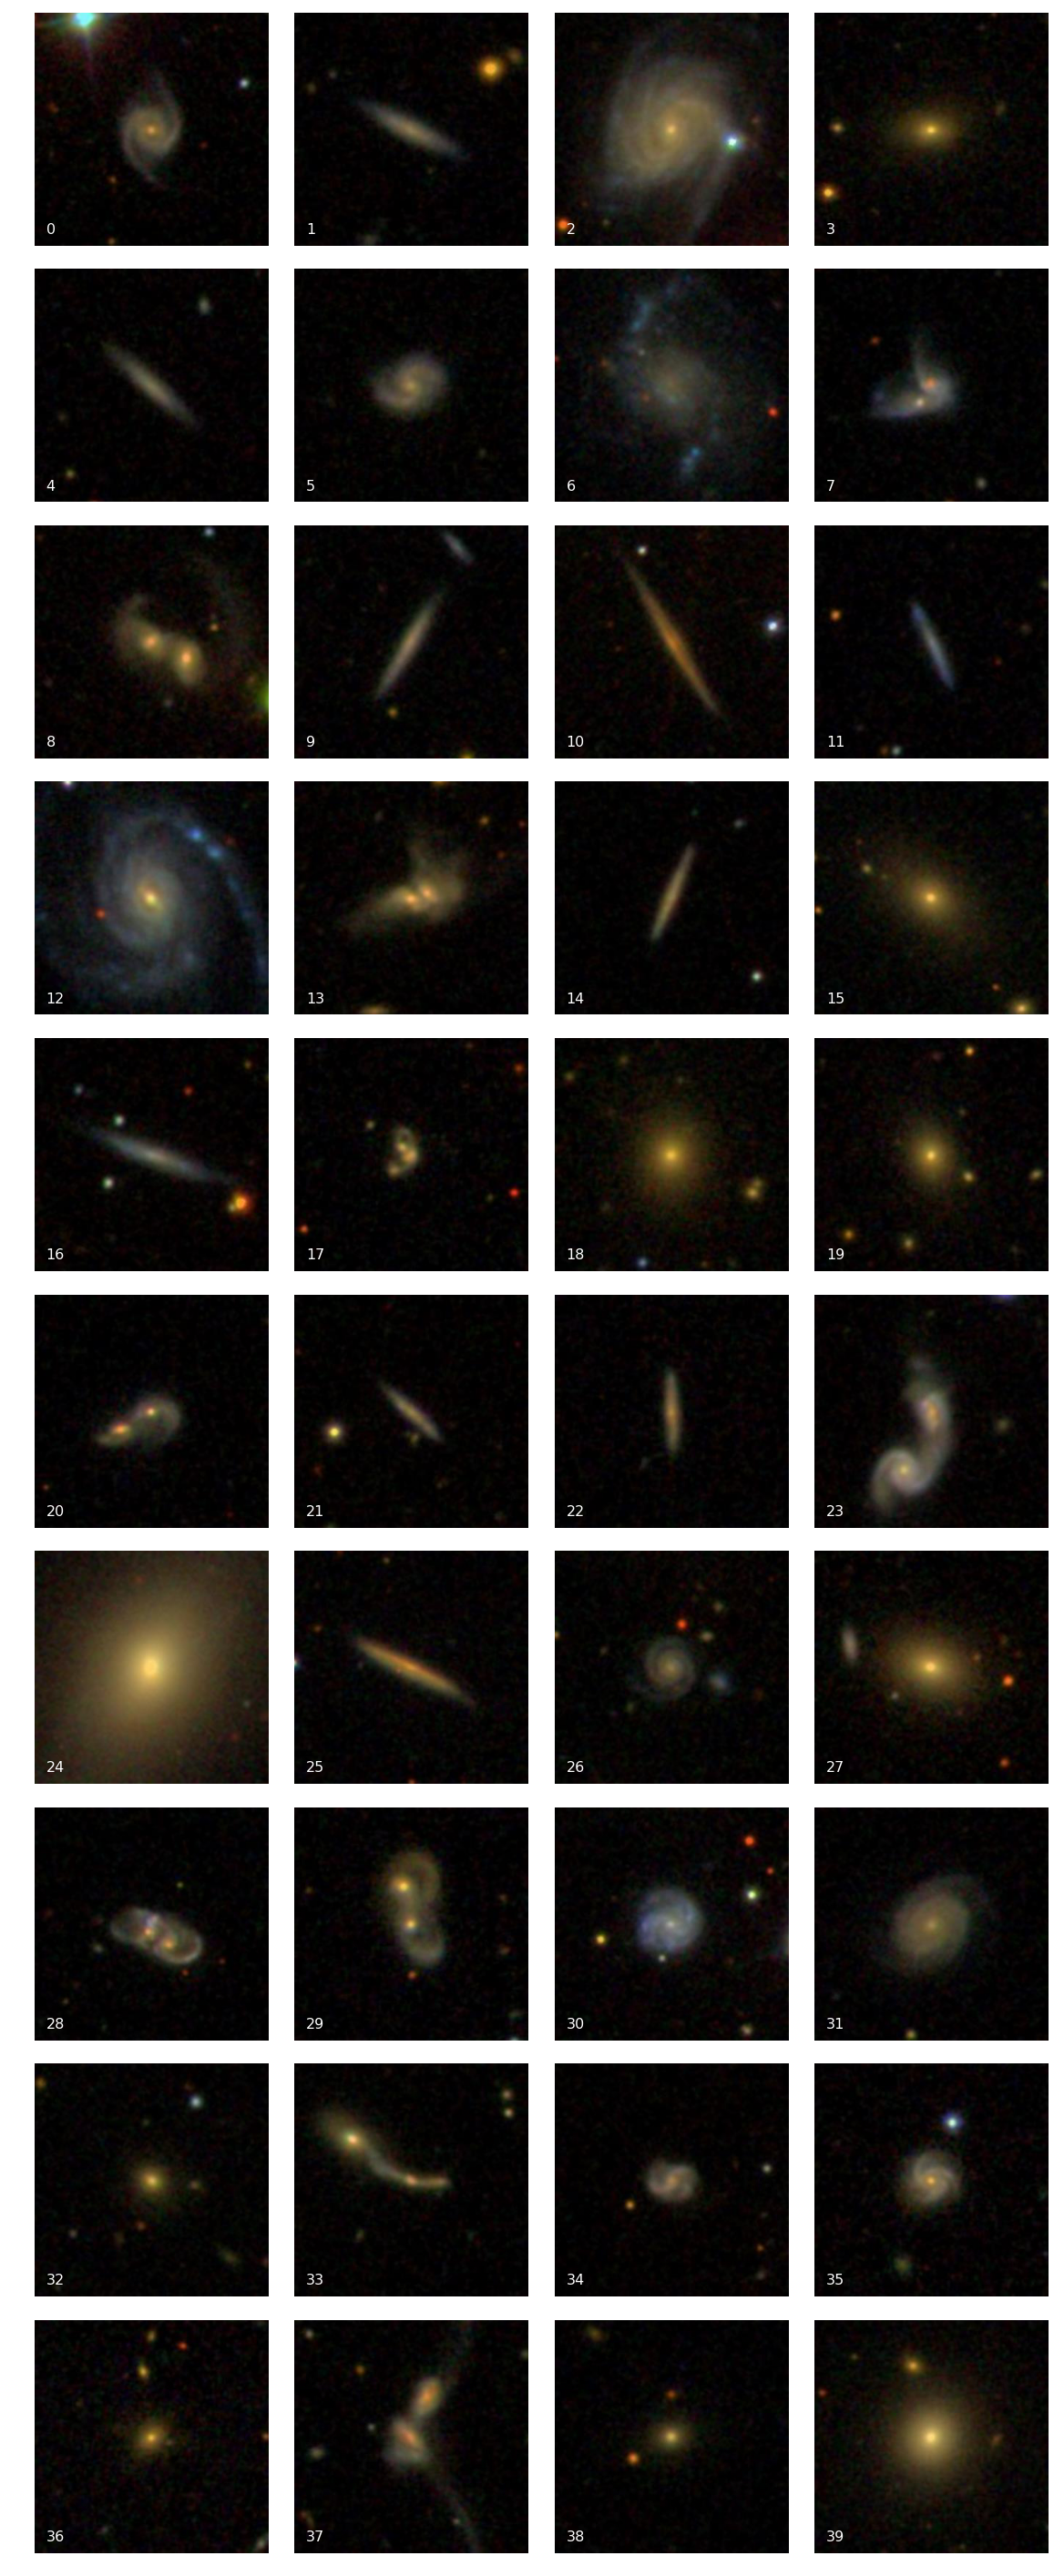

In [10]:
sdss_jpg(coo[0:41])

Para clasificar las galaxias anteriores ocuparemos 3 criterios:
-Forma: en las cuales estaran las categorias de 
*Elipticas: Grandes y con forma de esfera
*Espirales: se refiere a un nucleo con brazos al rededor 
*Nucleo doble
-luminosidad:la cual se debe a la cantidad de estrellas

Elipticas:     3,15,18,19,7,15,18,19,21,22,24,27,32,36,38,39
Espirales:     0,1,2,4,5,9,10,11,12,14,16,25,26,30,31,34,35
Nucleo doble:  8,13,17,20,23,28,29,33,37

luminosidad:
Mayor: 0,2,3,8,10,12,13,15,18,19,22,23,24,25,27,29,32,33,36,37,39
Menor: 1,4,5,6,7,9,11,14,16,17,20,21,26,28,30,31,34,35,38


### Parte 2

Procesando galaxia 0
Procesando galaxia 1
Procesando galaxia 2
Procesando galaxia 3
Procesando galaxia 4
Procesando galaxia 5
Procesando galaxia 6
Procesando galaxia 7
Procesando galaxia 8
Procesando galaxia 9
Procesando galaxia 10
Procesando galaxia 11
Procesando galaxia 12
Procesando galaxia 13
Procesando galaxia 14
Procesando galaxia 15
Procesando galaxia 16
Procesando galaxia 17
Procesando galaxia 18
Procesando galaxia 19
Procesando galaxia 20
Procesando galaxia 21
Procesando galaxia 22
Procesando galaxia 23
Procesando galaxia 24
Procesando galaxia 25
Procesando galaxia 26
Procesando galaxia 27
Procesando galaxia 28
Procesando galaxia 29
Procesando galaxia 30
Procesando galaxia 31
Procesando galaxia 32
Procesando galaxia 33
Procesando galaxia 34
Procesando galaxia 35
Procesando galaxia 36
Procesando galaxia 37
Procesando galaxia 38
Procesando galaxia 39


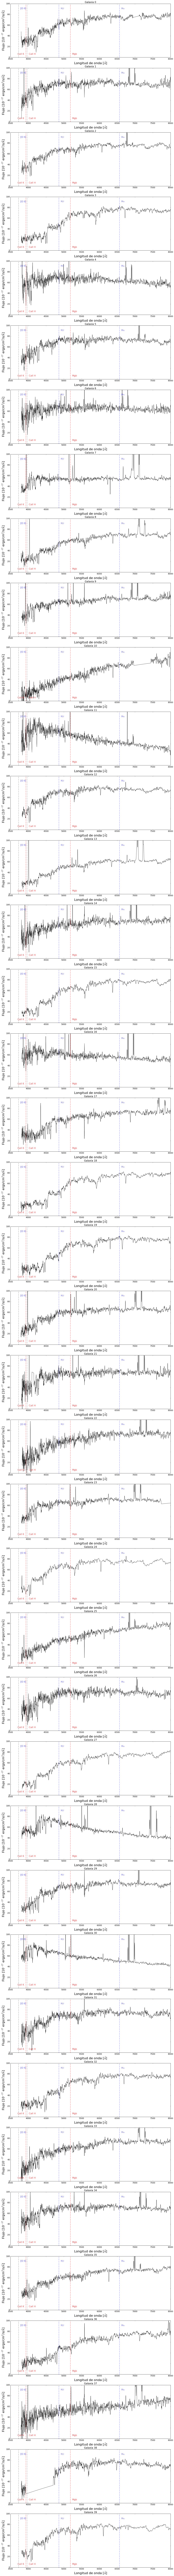

In [11]:
sdss_spectra(coo[0:41])

se clasificara segun el flujo maximo que se tiene en longitudes de onda determinadas, tambien en la variacion del
flujo con respecto a la variacion de la longitud de onda  y finalmente si aumenta o disminuye su flujo conforme
aumenta o disminuye su longitud de onda


punto maximo de flujo:
    Entre 3500A y 5000A :[4,7,8,11]
    Entre 5000A y 6500A :[0,15]
    Entre 6500A y 8000A :[1,2,3,5,6,9,10,12,13,14,16,17]
variacion del flujo:
    Muy variante  :[1,4,6,7,8,9,10,11,14,16,17]
    Poco variante :[0,2,3,5,12,13,15]
Cambio del flujo:
    Aumenta   :[0,2,3,8,9,10,12,13,14,15,17
    Disminuye :[11]
    Constante :[1,4,5,6,7,16]


### Parte 3

se clasificaran en galaxias espirales con flujo ascendente, galaxias espirales con flujo descendiente y 
galaxias elipticas con flujo muy variante

galaxias espirales con flujo ascendente  :
galaxias espirales con flujo descendiente: 
galaxias elipticas con flujo muy variante:

### Parte 4

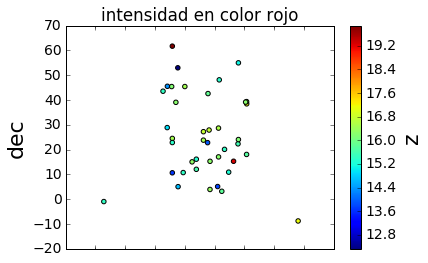

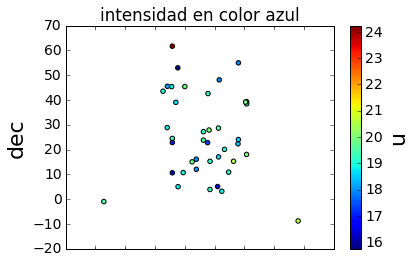

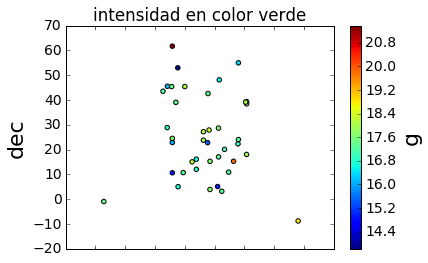

In [16]:
#se clasificaran distantas luminosidades en distintos colores:
data1.plot.scatter(x='ra',y='dec',c='z',colormap='jet')
plt.title('intensidad en color rojo')
data1.plot.scatter(x='ra',y='dec',c='u',colormap='jet')
plt.title('intensidad en color azul')
data1.plot.scatter(x='ra',y='dec',c='g',colormap='jet')
plt.title('intensidad en color verde')

### Parte 5

In [ ]:
se clasificaran en cuanto a cuan intensos son en color verde, estableciendo 3 rangos: (14-16) (16-18) (18-22)
    

# Una vez terminada la sesion del taller, debera ejecutar las siguientes dos celdas para subir su trabajo al servidor donde quedara almacenada

In [17]:
%%javascript
var kernel = IPython.notebook.kernel;
var thename = window.document.getElementById("notebook_name").innerHTML;
var command = "notebook_file = " + "'"+thename+"'";
kernel.execute(command);

<IPython.core.display.Javascript object>

In [ ]:
from IPython.display import display,Javascript,HTML
import dropbox
import socket
import string

# Get the hostname
hostname=string.split(socket.gethostname(),'.')[0]

# Save the notebook
display(Javascript('IPython.notebook.save_checkpoint();'))

try:
    integrante_exist= (integrante1 != '' and integrante2!= '')
except NameError:
    display(HTML("<big><b><br>Los nombres de los integrantes no estan definidos. Revise la primera celda y escriba los nombres.</b></big>"))
else:
    if integrante_exist:
        output_file='/'+notebook_file+'_'+hostname+'_'+integrante1+'_'+integrante2+'_'+integrante3+'.ipynb'
        
        display(HTML("<big><b><br>Nombres de los integrantes:</b></big>"))
        display(HTML("<big>{}<br>{}</big>".format(integrante1,integrante2,integrante3)))
        display(HTML("<big><b><br>Nombre del archivo:</b></big>"))
        display(HTML("<big>{}</big>".format(output_file)))

        client=dropbox.client.DropboxClient('q96bL4l9oyAAAAAAAAAACEK7gCFwoO-PtZu5jJ6gynNwriiBjzTLsN0eV51YQhNe')

        f = open(notebook_file+'.ipynb', 'rb')
        response = client.put_file(output_file,f)
        f.close()
        display(HTML("<big><b><br>Registro del servidor de Dropbox:</b></big>"))
        print response
    else:
        display(HTML("<big><b><br>Los nombres de los integrantes no estan definidos. Revise la primera celda y escriba los nombres.</b></big>"))

<IPython.core.display.Javascript object>